## Displaying application graphs

Importing libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.font_manager as fm

from matplotlib.ticker import PercentFormatter

Reading data from the results as a DataFrame (table)

In [83]:
df = pd.read_csv('data/results_superficial.csv', index_col=0)

Format index column to datetime

In [84]:
df.index = pd.to_datetime(df.index)

Adds deficits as df columns

In [102]:
df['def1'] = pd.read_csv('data/def1.csv')
df['def2'] = pd.read_csv('data/def2.csv')
df['def3'] = pd.read_csv('data/def3.csv')

Display the DataFrame

In [103]:
display(df)

,Irrigation_A_3,Rural_2,Irrigation_A_1,Rural_1,Irrigation_A_2,Supply_city,L_34,def1,def2,def3
Datetime,,,,,,,,,,
2001-06-01,0.0,0.000389,0.000022,0.001167,0.000194,0.62,1.999721,NaN,NaN,NaN
2001-07-01,0.0,0.000389,0.000022,0.001167,0.000000,0.62,2.231533,NaN,NaN,NaN
2001-08-01,0.0,0.000389,0.000007,0.001167,0.000061,0.62,1.380010,NaN,NaN,NaN
2001-09-01,0.0,0.000389,0.000000,0.001167,0.000088,0.62,0.891316,NaN,NaN,NaN
2001-10-01,0.0,0.000389,0.000000,0.001167,0.000000,0.62,1.047132,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2010-04-01,0.0,0.000389,0.000000,0.001167,0.000000,0.62,0.849205,NaN,NaN,NaN
2010-05-01,0.0,0.000389,0.000000,0.001167,0.000048,0.62,1.794970,NaN,NaN,NaN
2010-06-01,0.0,0.000389,0.000004,0.001167,0.000039,0.62,4.177413,NaN,NaN,NaN


In [104]:
# Customizable figure size - Article formatting

size_minimal = (1.1811, 3)
size = (3.54331, 3)
size_one_half_column = (5.51181, 3)
size_full_column = (7.48031, 3)

Set the font to Times New Roman

In [105]:
font_path = fm.findfont(fm.FontProperties(family='Times New Roman'))
plt.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()

Plotting a graph based on the DataFrame

Data: Irrigation_A_3


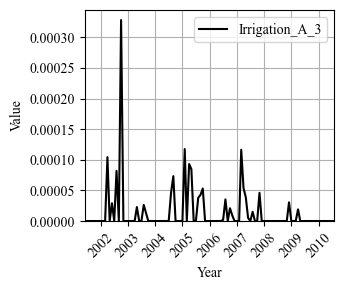

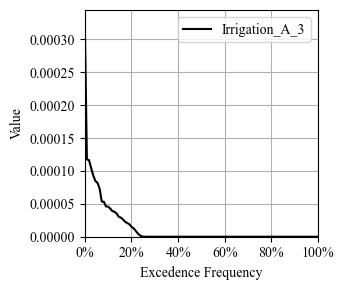

Data: Rural_2


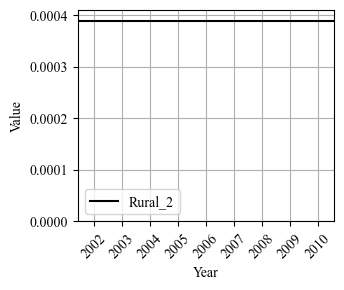

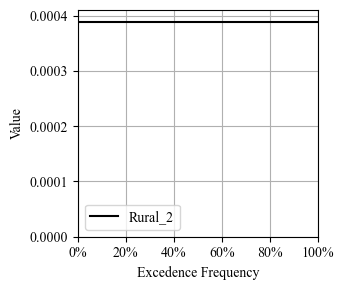

Data: Irrigation_A_1


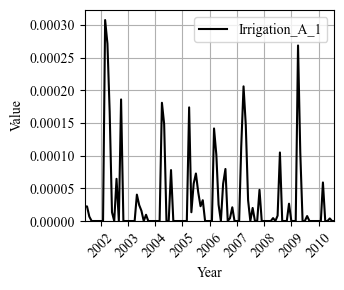

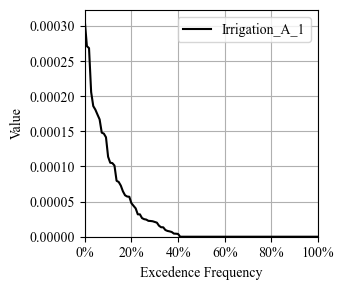

Data: Rural_1


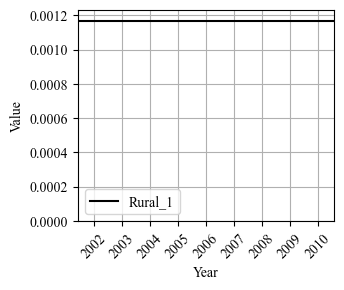

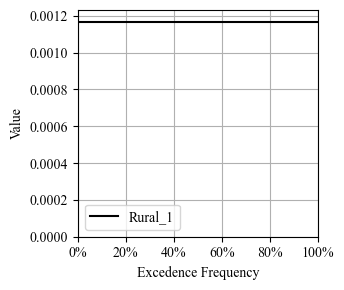

Data: Irrigation_A_2


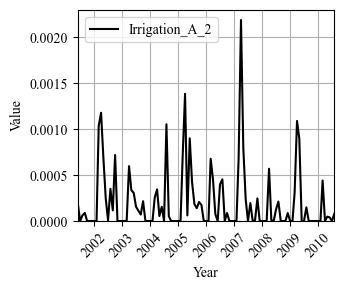

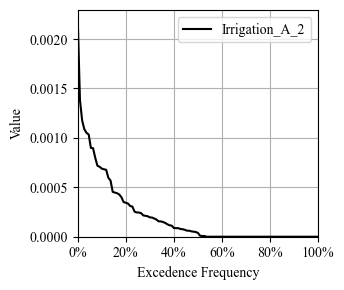

Data: Supply_city


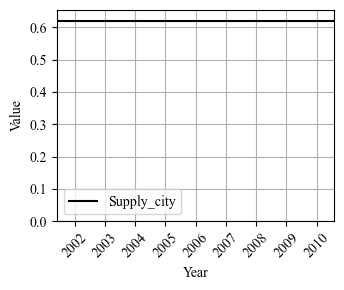

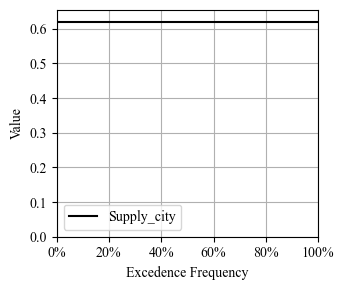

Data: L_34


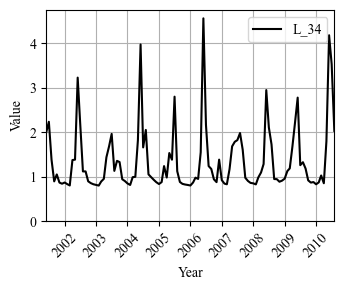

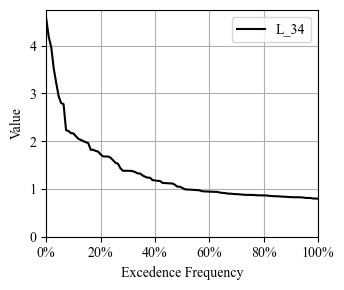

Data: def1


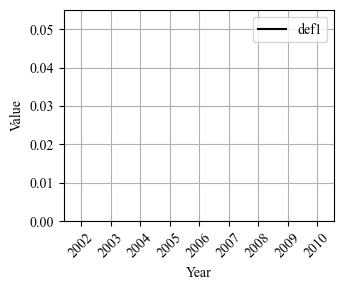

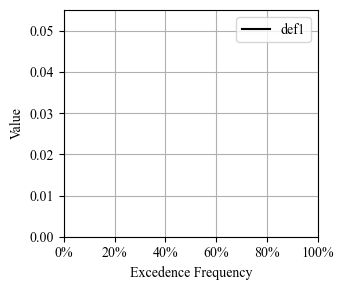

Data: def2


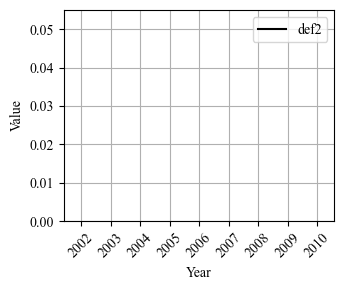

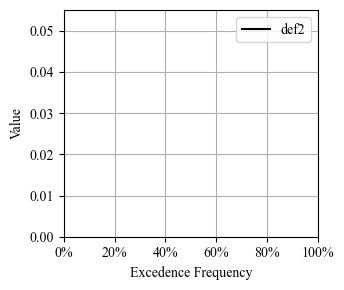

Data: def3


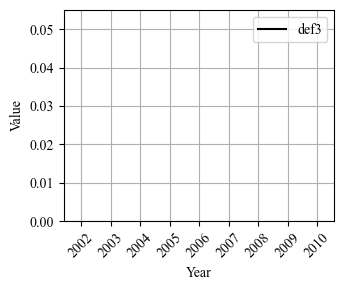

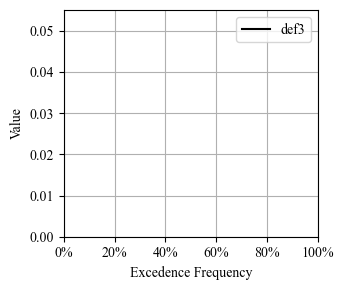

In [106]:
# Iterate over the columns of the DataFrame
for column in df.columns:
    print(f'Data: {column}')
    
    # Plot the first graph
    fig, ax = plt.subplots(figsize=size)
    
    ax.plot(df.index, df[column].values, color='black', linewidth=1.5, label=column)
    ax.legend()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    
    plt.xticks(rotation=45)
    
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    
    ax.set_xlim(df.index.min(), df.index.max())
    ax.set_ylim(0)
    
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()

    # Plot the second graph (Duration Curve)
    fig, ax = plt.subplots(figsize=size)
    perc = np.linspace(0, 1, len(df))
    
    ax.plot(perc, df[column].sort_values(ascending=False).values, color='black', linewidth=1.5, label=column)
    ax.legend()
    
    ax.set_xlabel('Excedence Frequency')
    ax.set_ylabel('Value')
    
    ax.xaxis.set_major_formatter(PercentFormatter(xmax=1))
    ax.set_xlim(0, 1)
    ax.set_ylim(0)
    
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()


Creating a function from the previous plots

In [89]:
def df_graphs(df1, df2, alias_df1='df1', alias_df2='df2',
              size=size_one_half_column,
              y_axis_labels={}):
    """
    Plot graphs for each column in two DataFrames.

    Args:
        df1 (DataFrame): The first DataFrame.
        df2 (DataFrame): The second DataFrame.
        alias_df1 (str, optional): Alias for the first DataFrame. Defaults to 'df1'.
        alias_df2 (str, optional): Alias for the second DataFrame. Defaults to 'df2'.
        size (tuple, optional): Size of the plots. Defaults to size_one_half_column.
        y_axis_labels (dict, optional): Custom y-axis labels for each column. Defaults to {}.

    Returns:
        None
    """

    # Iterate over the columns of the DataFrames
    for column in df1.columns:
        print(f'Dado: {column}')

        # Plot the first graph
        fig, ax = plt.subplots(figsize=size)

        ax.plot(df1.index, df1[column].values, color='black', linewidth=1.5, linestyle='-', label=f'{alias_df1} - ' + column)
        ax.plot(df2.index, df2[column].values, color='red', linewidth=1.5, linestyle='--',label=f'{alias_df2} - ' + column)
        ax.legend()
        ax.xaxis.set_major_locator(mdates.YearLocator())

        plt.xticks(rotation=45)

        ax.set_xlabel('Year')
        ax.set_ylabel(y_axis_labels.get(column, 'Value'))

        ax.set_xlim(min(df1.index.min(), df2.index.min()), max(df1.index.max(), df2.index.max()))
        ax.set_ylim(0)

        ax.grid(True)

        plt.tight_layout()
        plt.show()

        # Plot the second graph (Duration Curve)
        fig, ax = plt.subplots(figsize=size)
        perc = np.linspace(0, 1, max(len(df1), len(df2)))

        ax.plot(perc, df1[column].sort_values(ascending=False).values, color='black', linewidth=1.5, linestyle='-',  label=f'{alias_df1} - ' + column)
        ax.plot(perc, df2[column].sort_values(ascending=False).values, color='red', linewidth=1.5, linestyle='--', label=f'{alias_df2} - ' + column)
        ax.legend()

        ax.set_xlabel('Excedence Frequency')
        ax.set_ylabel(y_axis_labels.get(column, 'Value'))

        ax.xaxis.set_major_formatter(PercentFormatter(xmax=1))
        ax.set_xlim(0, 1)
        ax.set_ylim(0)

        ax.grid(True)

        plt.tight_layout()
        plt.show()

Creating a second DataFrame (df2) with other results

In [90]:
df2 = pd.read_csv('data/results_superficial_eco.csv', index_col=0)

In [107]:
df2
df2.index = pd.to_datetime(df2.index)

df2['def1'] = pd.read_csv('data/def1_eco.csv')
df2['def2'] = pd.read_csv('data/def2_eco.csv')
df2['def3'] = pd.read_csv('data/def3_eco.csv')

Setting graph labels for y axis

In [110]:
labels = {'Irrigation_A_3': 'm³/month',
          'Rural_2': 'm³/month',
          'Irrigation_A_1': 'm³/month',
          'Rural_1': 'm³/month',
          'Irrigation_A_2': 'm³/month',
          'Supply_city': 'm³/month',
          'def1': 'm³/month',
          'def2': 'm³/month',
          'def3': 'm³/month'}

Using the function to plot both DataFrames into the same plot

Dado: Irrigation_A_3


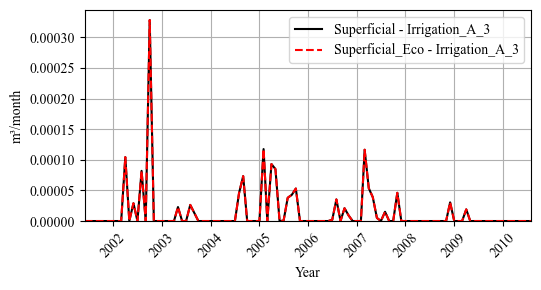

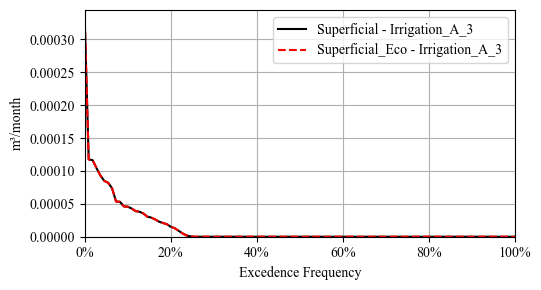

Dado: Rural_2


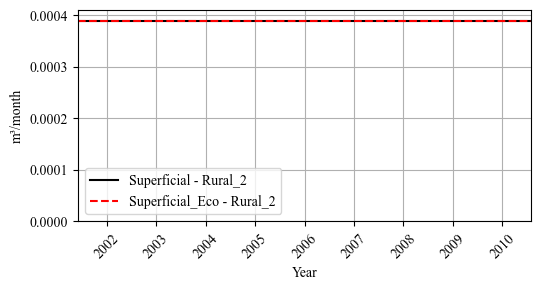

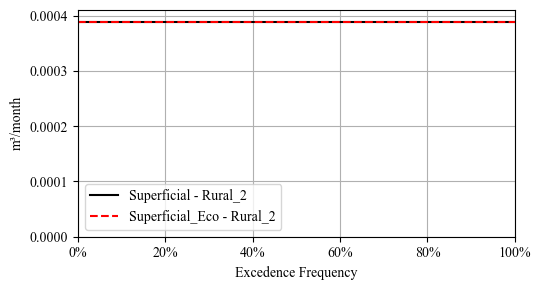

Dado: Irrigation_A_1


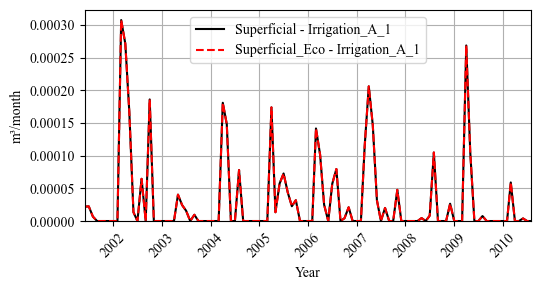

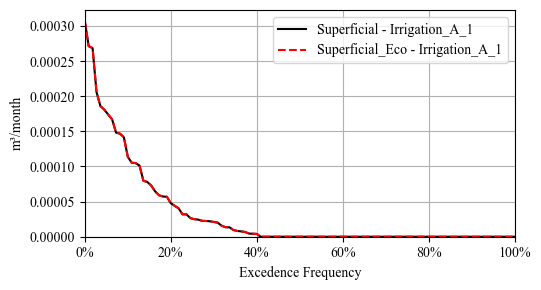

Dado: Rural_1


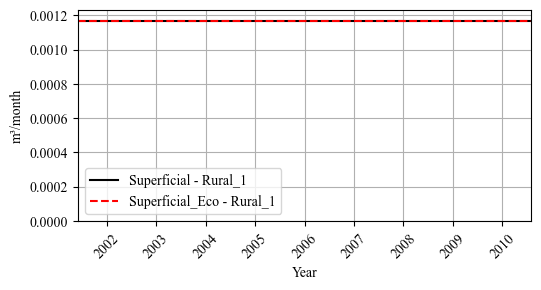

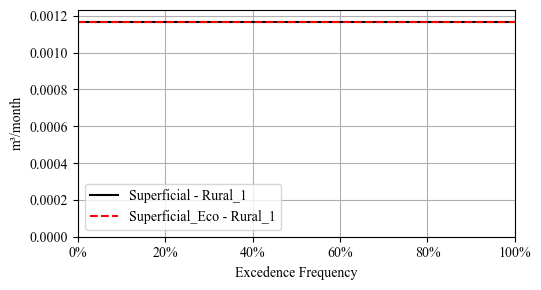

Dado: Irrigation_A_2


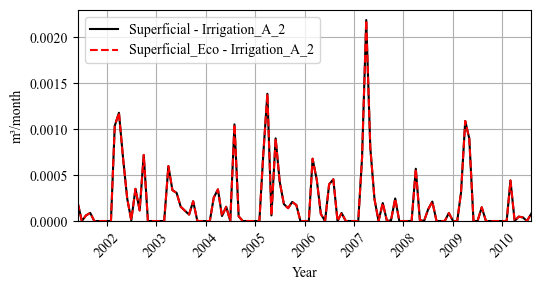

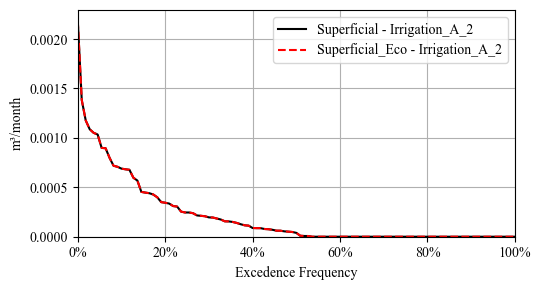

Dado: Supply_city


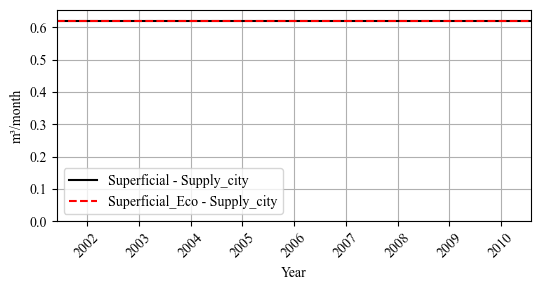

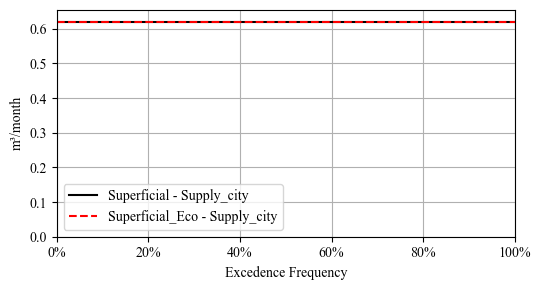

Dado: L_34


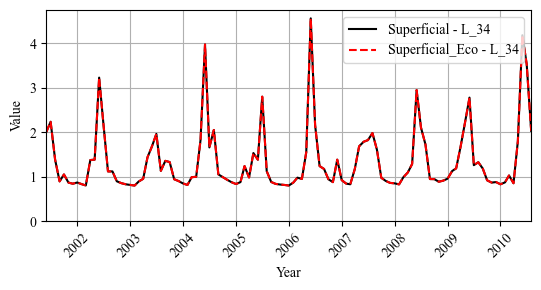

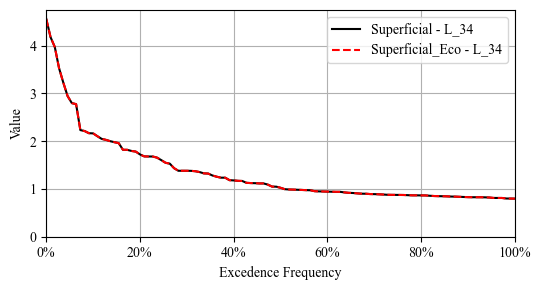

Dado: def1


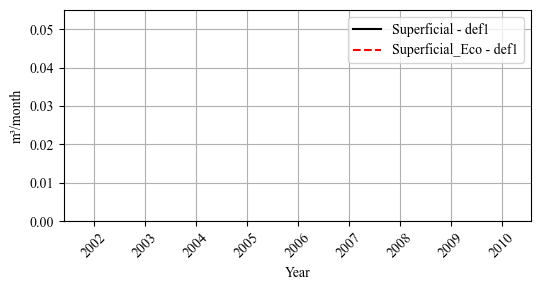

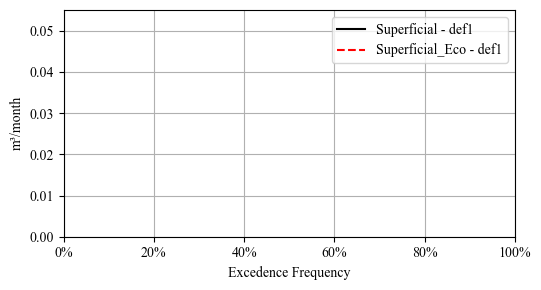

Dado: def2


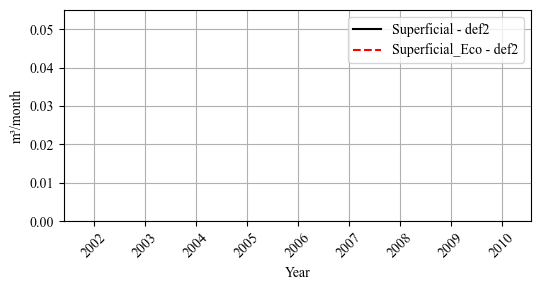

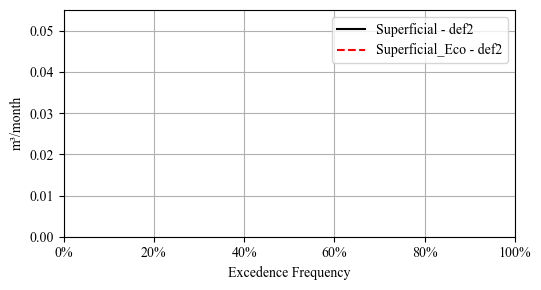

Dado: def3


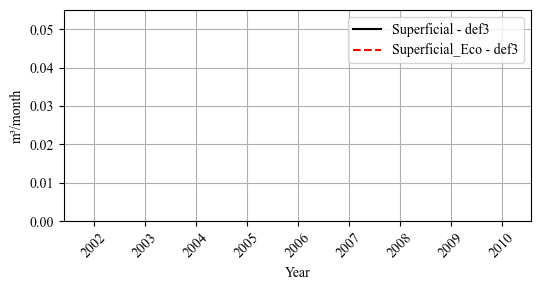

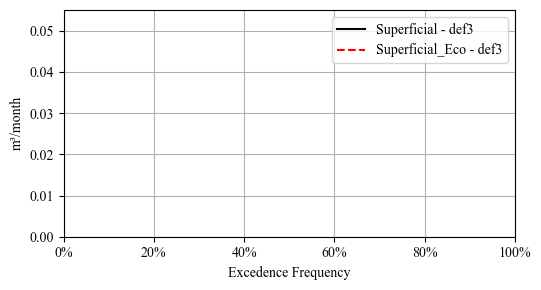

In [111]:
df_graphs(df, df2,
          alias_df1='Superficial', alias_df2='Superficial_Eco',
          y_axis_labels=labels)

Converting to units to m³/s

In [94]:
df = df/30/86400
df2 = df2/30/86400

Dado: Irrigation_A_3


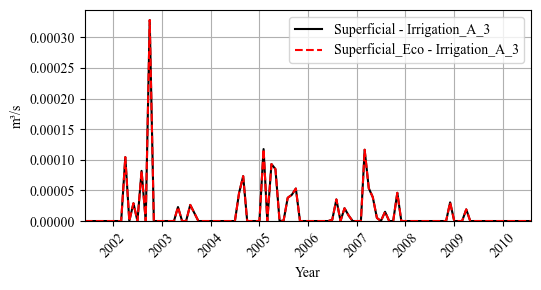

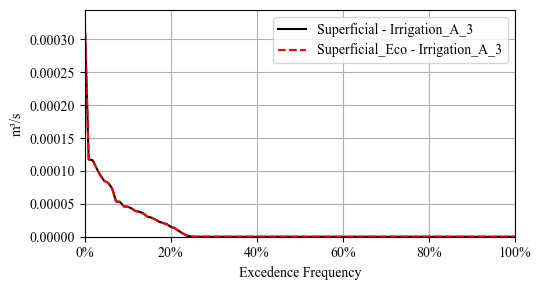

Dado: Rural_2


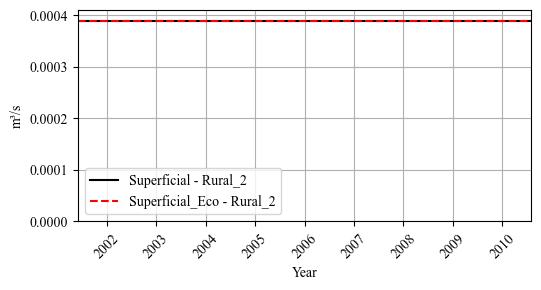

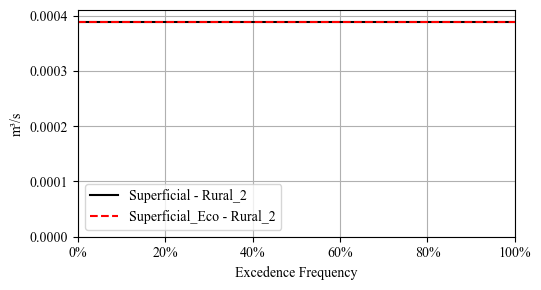

Dado: Irrigation_A_1


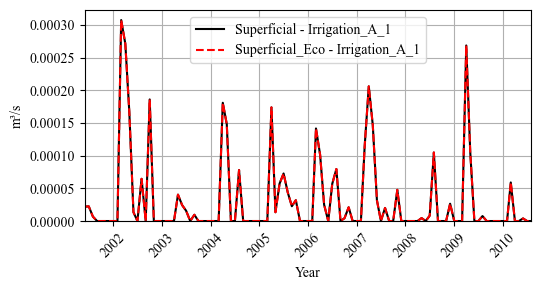

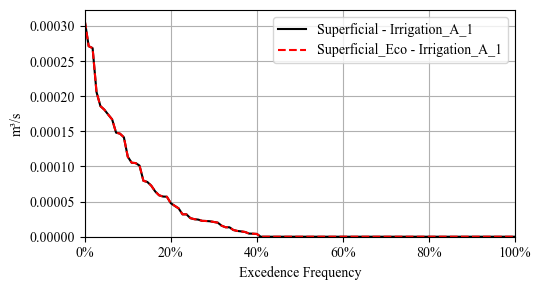

Dado: Rural_1


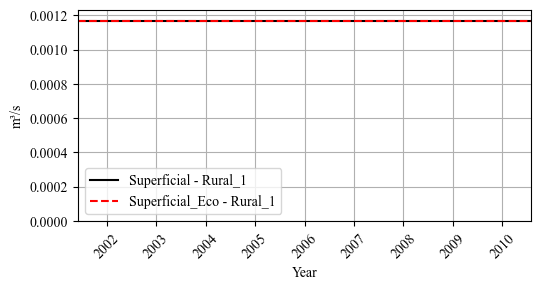

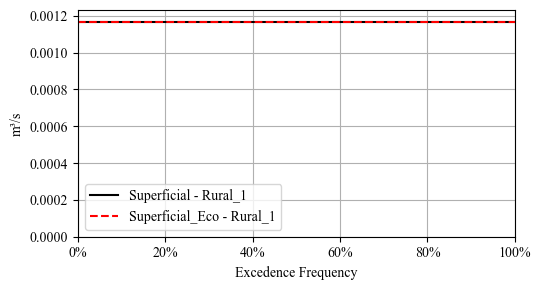

Dado: Irrigation_A_2


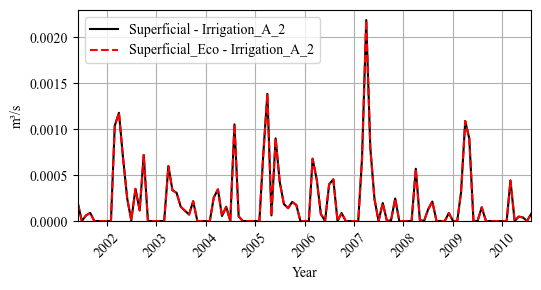

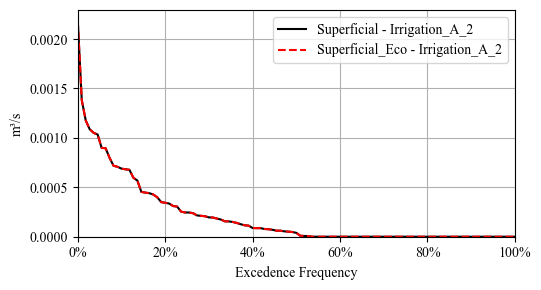

Dado: Supply_city


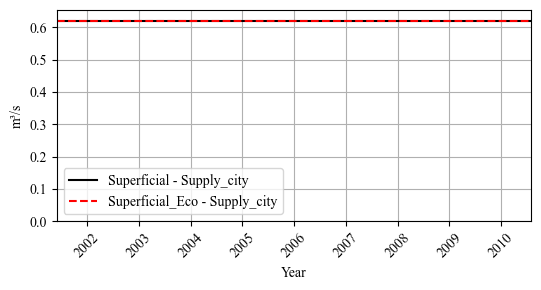

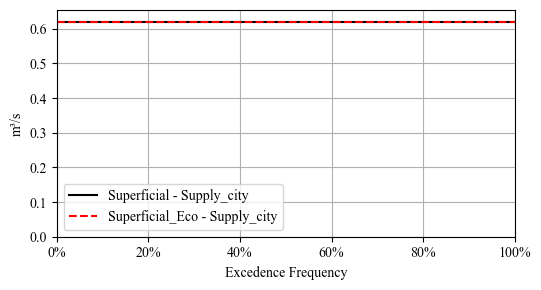

Dado: L_34


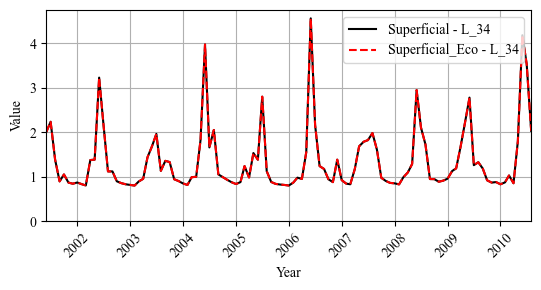

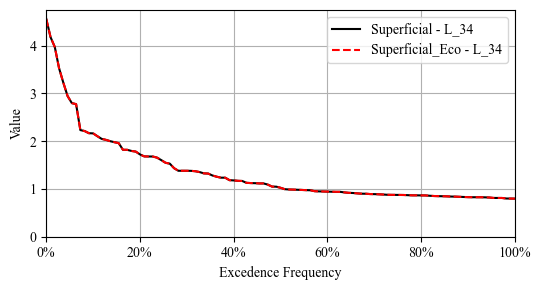

Dado: def1


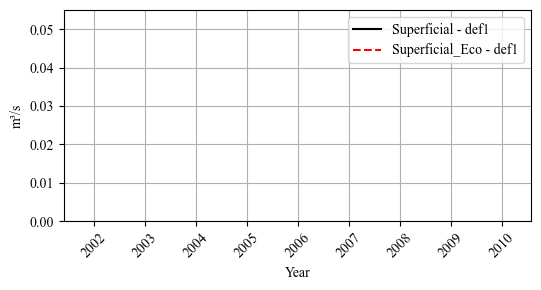

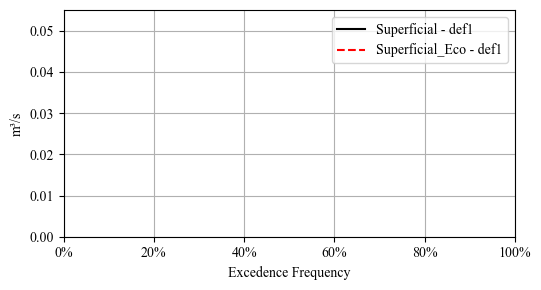

Dado: def2


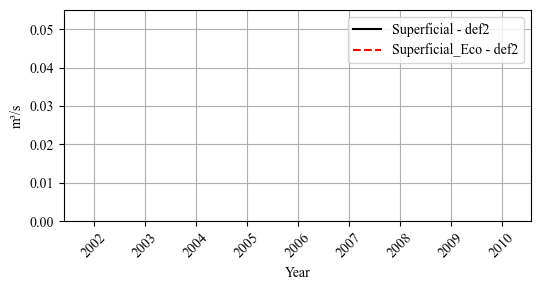

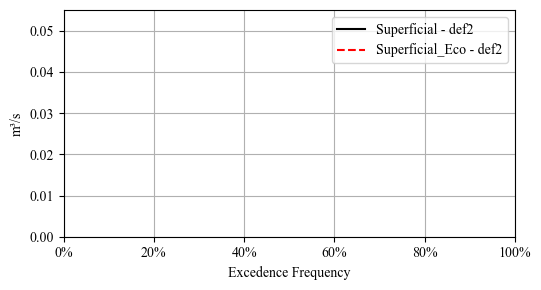

Dado: def3


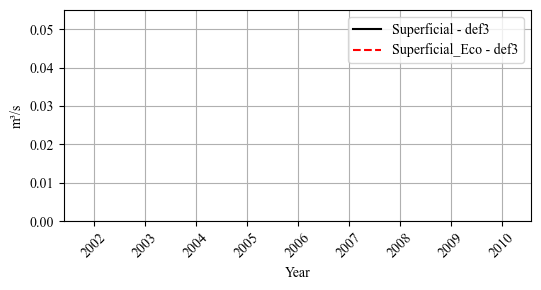

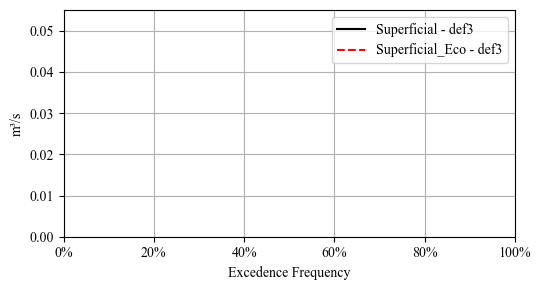

In [112]:
labels_daily = {'Irrigation_A_3': 'm³/s',
          'Rural_2': 'm³/s',
          'Irrigation_A_1': 'm³/s',
          'Rural_1': 'm³/s',
          'Irrigation_A_2': 'm³/s',
          'Supply_city': 'm³/s',
          'def1': 'm³/s',
          'def2': 'm³/s',
          'def3': 'm³/s'}

df_graphs(df, df2,
          alias_df1='Superficial', alias_df2='Superficial_Eco',
          y_axis_labels=labels_daily)